In [ ]:
from os import truncate
from google.colab import drive
drive.mount('/content/drive' , force_remount = True)

# Navigate to the directory where your zip file is located
%cd /content/drive/MyDrive/
!unzip archive.zip


Mounted at /content/drive
/content/drive/MyDrive
Archive:  archive.zip
replace Thyroid_Diff.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Thyroid_Diff.csv')
df.head(3)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [ ]:
df['Recurred'].value_counts()

No     275
Yes    108
Name: Recurred, dtype: int64

In [ ]:
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [ ]:
columns_to_encode = ['Age','Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Recurred'] = label_encoder.fit_transform(df['Recurred'])

In [ ]:
df.tail(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,1
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,1


In [ ]:
X = df.drop('Recurred',axis =1)
y =df['Recurred']

In [ ]:
X.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent


In [ ]:
y.head(2)

0    0
1    0
Name: Recurred, dtype: int64

In [ ]:
X = pd.get_dummies(X,drop_first=True).astype(int)
X.head(3)

,Age,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,34,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,30,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X.shape

(383, 40)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_LR = logreg_model.predict(X_test)
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        58
           1       0.94      0.89      0.92        19

    accuracy                           0.96        77
   macro avg       0.96      0.94      0.95        77
weighted avg       0.96      0.96      0.96        77



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },

    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],

        }
    },
    'Knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    }
}

In [ ]:
scores = []

for model_name, params in model_params.items():
    GSv =  GridSearchCV(params['model'], params['params'], cv=5, return_train_score=False)
    GSv.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': GSv.best_score_,
        'best_params': GSv.best_params_
    })

df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,svm,0.934744,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.937916,{'n_estimators': 5}
2,logistic_regression,0.931412,{'C': 1}
3,naive_bayes_gaussian,0.888683,{}
4,decision_tree,0.951137,{'criterion': 'entropy'}
5,Knn,0.915019,"{'n_neighbors': 5, 'weights': 'distance'}"


In [ ]:
df_model_score.sort_values(by = 'best_score',ascending = False)

,model,best_score,best_params
4,decision_tree,0.951137,{'criterion': 'entropy'}
1,random_forest,0.937916,{'n_estimators': 5}
0,svm,0.934744,"{'C': 1, 'kernel': 'rbf'}"
2,logistic_regression,0.931412,{'C': 1}
5,Knn,0.915019,"{'n_neighbors': 5, 'weights': 'distance'}"
3,naive_bayes_gaussian,0.888683,{}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, y_test are already prepared

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate SVM classifier (using the RBF kernel in this example)
svm_model = SVC(kernel='rbf')

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

# Assuming y_test and y_pred are already defined

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_accuracy)

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.987012987012987
Balanced Accuracy: 0.9736842105263157
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



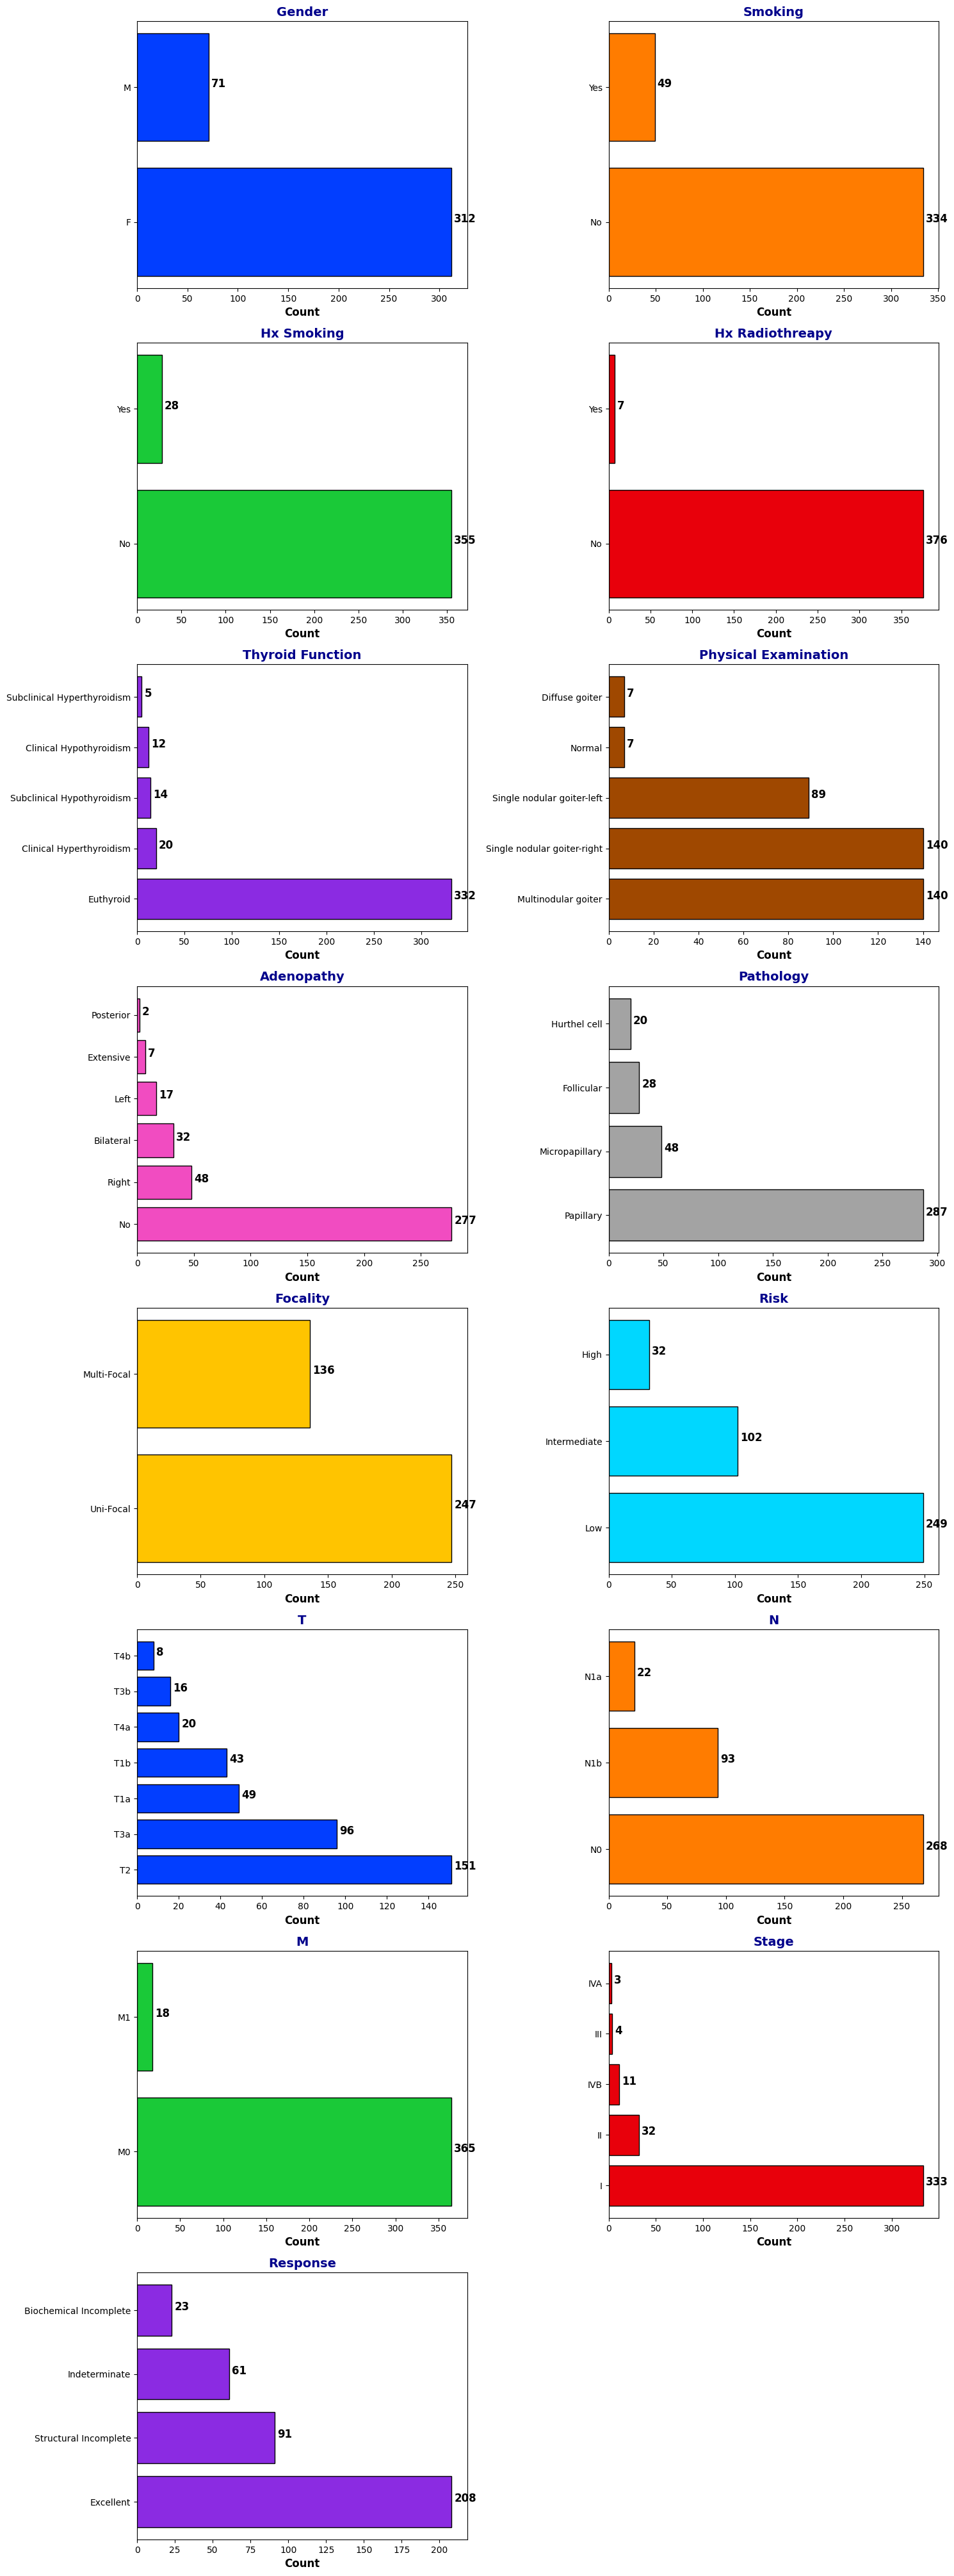

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_features = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
                        'Thyroid Function', 'Physical Examination', 'Adenopathy',
                        'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']
# Define a list of bright colors
bright_colors = sns.color_palette("bright", len(categorical_features))

# Create subplots
fig, ax = plt.subplots(nrows=len(categorical_features), ncols=2, figsize=(15, 5 * len(categorical_features)))
ax = ax.flat

for i, cat_feat in enumerate(categorical_features):
    df_cat = df[cat_feat].value_counts().to_frame()
    labels = df_cat.index.to_list()
    values = df_cat.iloc[:, 0]

    # Plot bar plot for each categorical feature
    rects = ax[i].barh(y=labels, width=values, color=bright_colors[i], edgecolor='black')
    ax[i].set_xlabel("Count", fontsize=12, fontweight='bold', color='black')
    ax[i].set_title(cat_feat, fontsize=14, fontweight='bold', color='darkblue')

    # Add labels to the bars
    for rect in rects:
        width = rect.get_width()
        ax[i].annotate(text=width,
                       xy=(width, rect.get_y() + rect.get_height() / 2),
                       xytext=(3, 0),
                       textcoords='offset points',
                       fontsize=12,
                       fontweight='bold',
                       color='black')

# Remove any extra axes
for j in range(len(categorical_features), len(ax)):
    fig.delaxes(ax=ax[j])

fig.tight_layout()
plt.show()


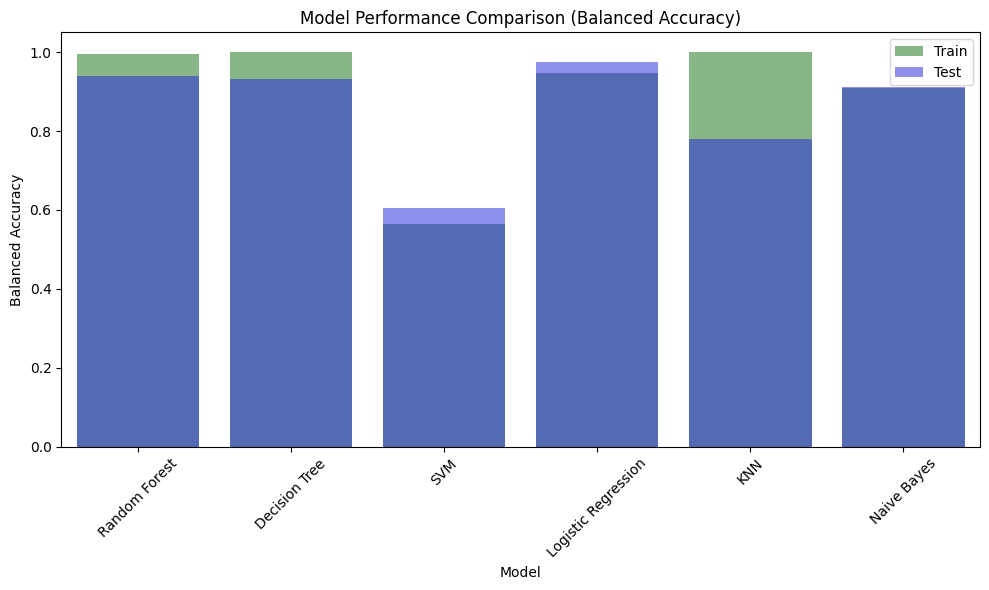

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'X' and 'y' are already defined

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=5),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy'),
    'SVM': SVC(C=1, kernel='rbf'),
    'Logistic Regression': LogisticRegression(C=1, solver='liblinear'),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance'),
    'Naive Bayes': GaussianNB()
}

# Train models and calculate balanced accuracy for train and test sets
train_scores = {}
test_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_scores[name] = balanced_accuracy_score(y_train, y_train_pred)
    test_scores[name] = balanced_accuracy_score(y_test, y_test_pred)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(train_scores.keys()), y=list(train_scores.values()), color='green', alpha=0.5, label='Train')
sns.barplot(x=list(test_scores.keys()), y=list(test_scores.values()), color='blue', alpha=0.5, label='Test')
plt.title('Model Performance Comparison (Balanced Accuracy)')
plt.xlabel('Model')
plt.ylabel('Balanced Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
pip install pandas==1.3.3

In [ ]:
pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=7eb78a0111a360d7d36cea7eb13be85c8c207e1a58063d6f86c0fbb2c3887d58
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

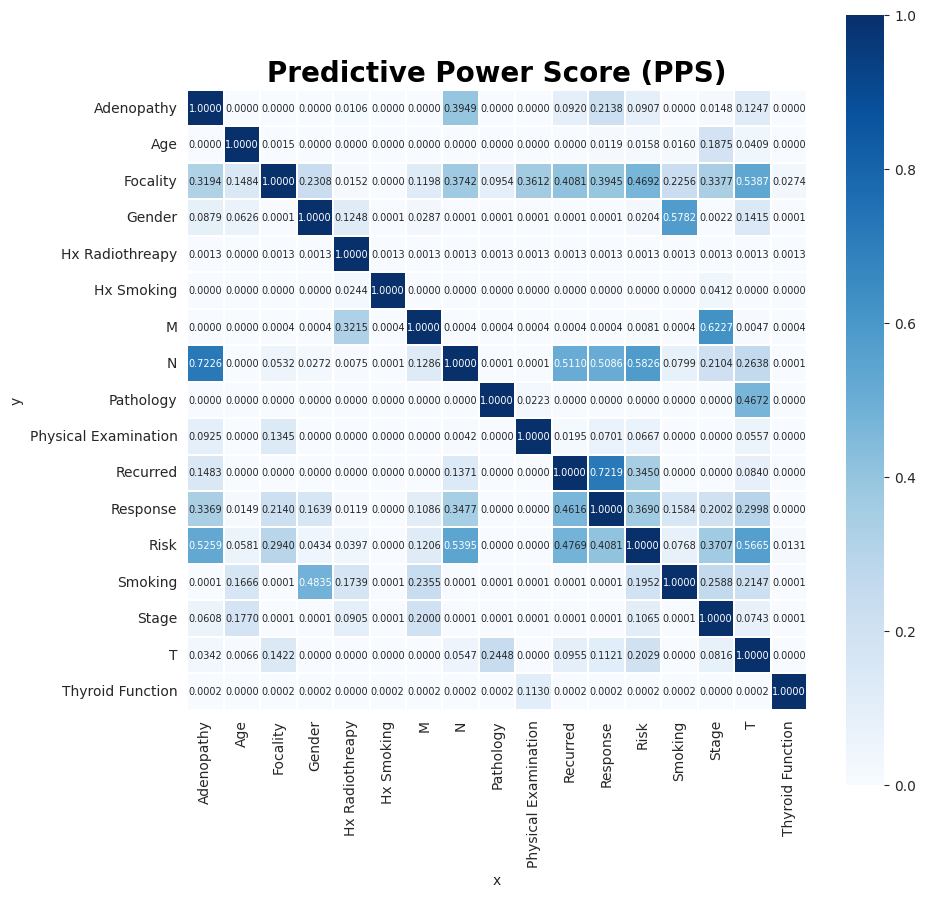

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps

# Set seaborn style to dark
sns.set_style("dark")

# Calculate the PPS matrix
pps_matrix = pps.matrix(df)[['x', 'y', 'ppscore']].pivot_table(values='ppscore',
                                                                 index='y',
                                                                 columns='x')

# Plotting the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(pps_matrix,
            cmap='Blues',
            annot=True,
            annot_kws={'fontsize': 7},
            fmt='.4f',
            square=True,
            linewidths=1.1)

# Setting title and labels
plt.title("Predictive Power Score (PPS)",
          fontsize=20,
          fontweight='bold',
          color='black')
plt.show()

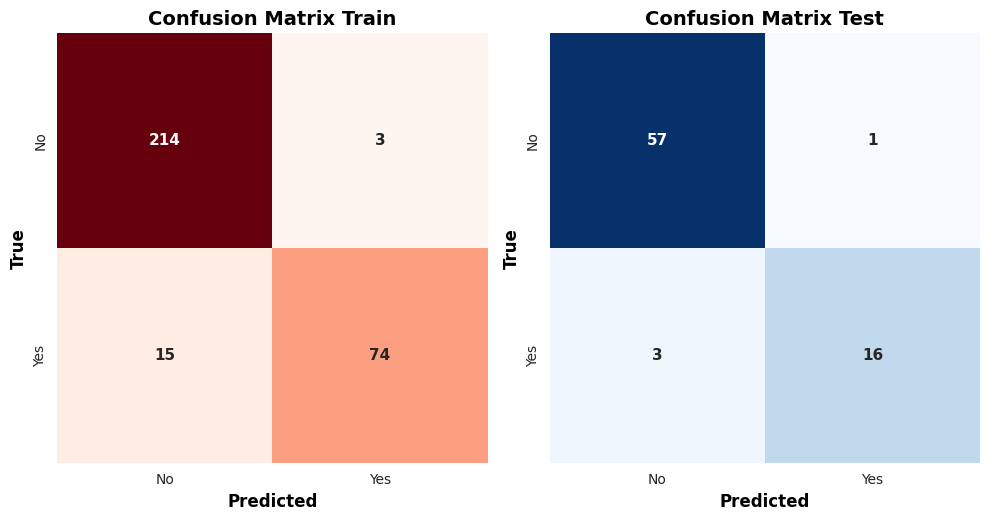

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrices
cf_mx_train = confusion_matrix(y_train, y_train_pred)
cf_mx_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs = axs.flat

# Plot confusion matrix for train set
sns.heatmap(cf_mx_train, cmap='Reds', annot=True, annot_kws={'fontsize': 11, 'fontweight': 'bold'}, fmt='',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], cbar=False, square=True, ax=axs[0])
axs[0].set_xlabel('Predicted', fontsize=12, fontweight="bold", color="black")
axs[0].set_ylabel('True', fontsize=12, fontweight="bold", color="black")
axs[0].set_title('Confusion Matrix Train', fontsize=14, fontweight="bold", color="black")

# Plot confusion matrix for test set
sns.heatmap(cf_mx_test, cmap='Blues', annot=True, annot_kws={'fontsize': 11, 'fontweight': 'bold'}, fmt='',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], cbar=False, square=True, ax=axs[1])
axs[1].set_xlabel('Predicted', fontsize=12, fontweight="bold", color="black")
axs[1].set_ylabel('True', fontsize=12, fontweight="bold", color="black")
axs[1].set_title('Confusion Matrix Test', fontsize=14, fontweight="bold", color="black")

fig.tight_layout()
plt.show()

In [ ]:
y_pred_prob_train = logreg_model.predict_proba(X_train)[:, 1]  # Extract probabilities of positive class

# For the test set
y_pred_prob_test = logreg_model.predict_proba(X_test)[:, 1]  #

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


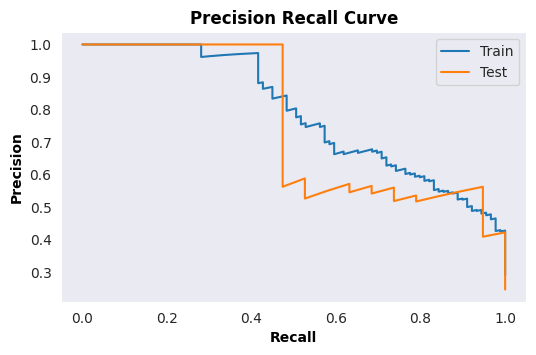

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred_prob_train)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_prob_test)
train_color = 'red'
test_color = 'blue'
fig, ax = plt.subplots(figsize=(6, 3.5))
ax.plot(recall_train, precision_train, label='Train')
ax.plot(recall_test, precision_test, label='Test')  # Corrected the label from 'Train' to 'Test'
ax.set_xlabel("Recall", fontsize=10, fontweight='bold', color='black')
ax.set_ylabel("Precision", fontsize=10, fontweight='bold', color='black')
ax.legend()
ax.set_title("Precision Recall Curve", fontsize=12, fontweight="bold", color="black")
plt.show()
